# Praktikum Pengantar Pembelajaran Mesin 
---
## BAB 8: Evaluasi Beberapa Algoritma Klasifikasi
- Nama: Rayhan Egar Sadtya Nugraha
- NIM: 225150201111014
- Kelas: PPM-D

## 1. Tentukan Metode Klasifikasi yang Akan di Evaluasi

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
names = []


## 2. Baca Dataset

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

In [8]:
! curl -o "r2.csv" "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  7665    0  7665    0     0   2944      0 --:--:--  0:00:02 --:--:--  2945


## 3. Tampilkan Dataset

In [14]:
df_r2 = pd.read_csv("r2.csv")
df_r2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## 4. Membuat Set Validasi

In [18]:
from sklearn.model_selection import train_test_split

X_df = df_r2[df_r2.columns[:-1]]
y_df = df_r2[df_r2.columns[-1]]
X_train, X_validation, y_train, y_validation = train_test_split(X_df, y_df, stratify=y_df, test_size=.2, random_state=1)

### K-Folds Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = np.array(cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy'))
    results.append(cv_results)
    names.append(cv_results)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

KNN: 0.5744444444444444 (0.09661556759257053)
NB: 0.6522222222222223 (0.12804802339863078)
SVC: 0.5544444444444444 (0.022470831573507426)


## 5. Buat Prediksi

In [26]:
model = GaussianNB()
model.fit(X_train, y_train)
y_prediction = model.predict(X_validation)

## 6. Evaluasi Prediksi

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_validation, y_prediction))

              precision    recall  f1-score   support

           1       0.53      0.91      0.67        11
           2       0.80      0.31      0.44        13

    accuracy                           0.58        24
   macro avg       0.66      0.61      0.56        24
weighted avg       0.67      0.58      0.55        24



---
## Tugas
1. Lakukan perbandingan klasifikasi antara KNN, Naive-Bayes, dan SVM untuk dataset _iris_ dan _breast cancer_.
2. Pada kedua daataset lakukan proses normalisasi data dan preproses data untuk menangani data yang hilang jika ada.

### Membaca Data

In [50]:
data_iris = load_iris()
data_cancer = load_breast_cancer()

X_df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
y_df_iris = pd.DataFrame(data_iris.target, columns=['variety'])

X_df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
y_df_cancer = pd.DataFrame(data_cancer.target, columns=['classification'])

In [51]:
print(f"X_df_iris shape: {X_df_iris.shape}")
print(f"y_df_iris shape: {y_df_iris.shape}")
print(f"X_df_cancer shape: {X_df_cancer.shape}")
print(f"y_df_cancer shape: {y_df_cancer.shape}")

X_df_iris shape: (150, 4)
y_df_iris shape: (150, 1)
X_df_cancer shape: (569, 30)
y_df_cancer shape: (569, 1)


### Cek Datatype dan Null Value

In [56]:
X_df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [57]:
X_df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Check Imbalance

<Axes: xlabel='variety', ylabel='count'>

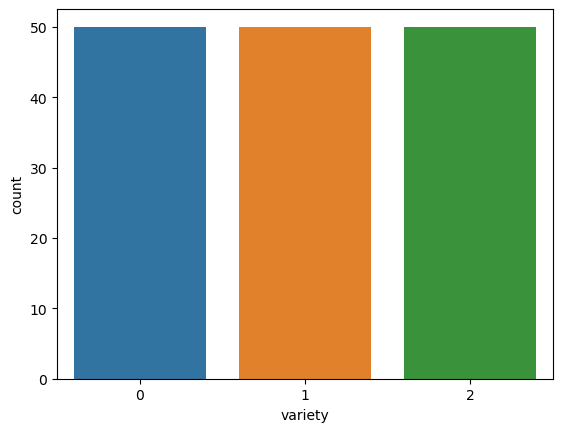

In [63]:
import seaborn as sns
sns.countplot(y_df_iris, x='variety')

<Axes: xlabel='classification', ylabel='count'>

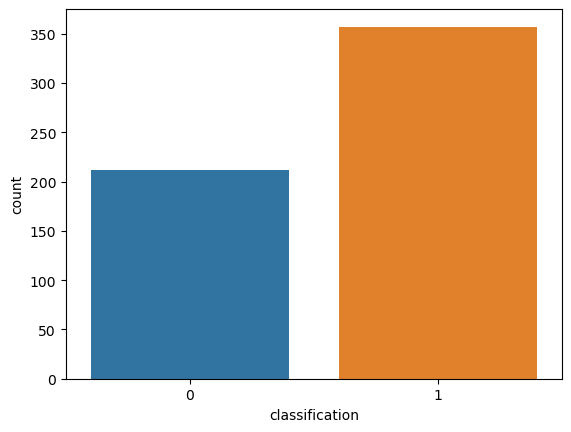

In [65]:
sns.countplot(y_df_cancer, x='classification')

### Normalisasi MinMax

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_df_iris_transformed = scaler.fit_transform(X_df_iris)
X_df_cancer_transformed = scaler.fit_transform(X_df_cancer)

In [53]:
X_train_iris, X_validation_iris, y_train_iris, y_validation_iris = train_test_split(X_df_iris_transformed, y_df_iris, stratify=y_df_iris, test_size=.2, random_state=1)
X_train_cancer, X_validation_cancer, y_train_cancer, y_validation_cancer = train_test_split(X_df_cancer_transformed, y_df_cancer, stratify=y_df_cancer, test_size=.2, random_state=1)

### K-Folds CV

In [78]:
def kfolds_cv(models, X_train, y_train, n_splits=10):
    kfolds_result = {}
    for name, model in models:
        kfold = StratifiedKFold(n_splits, random_state=1, shuffle=True)
        cv_results = np.array(cross_val_score(model, X_train, np.array(y_train).ravel(), cv=kfold, scoring='accuracy'))
        kfolds_result[name] = cv_results
        print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
    return kfolds_result

In [79]:
iris_kfolds = kfolds_cv(models, X_train_iris, y_train_iris, 10)

KNN: 0.9583333333333334 (0.05590169943749474)
NB: 0.95 (0.07637626158259733)
SVC: 0.95 (0.06666666666666665)


In [80]:
cancer_kfolds = kfolds_cv(models, X_train_cancer, y_train_cancer, 10)

KNN: 0.9736714975845411 (0.023551158177602477)
NB: 0.9296618357487922 (0.02382205889212225)
SVC: 0.9450724637681158 (0.02228415021571745)


Diketahui dari proses K-Folds Cross Validation dari dataset Iris dan breast cancer, keduanya cocok untuk menggunakan KNN dengan default value untuk parameter n_neighbors.

### Buat Prediksi

In [83]:
knn_iris = KNeighborsClassifier()
knn_cancer = KNeighborsClassifier()

knn_iris.fit(X_train_iris, np.array(y_train_iris).ravel())
y_prediction_iris = knn_iris.predict(X_validation_iris)

knn_cancer.fit(X_train_cancer, np.array(y_train_cancer).ravel())
y_prediction_cancer = knn_cancer.predict(X_validation_cancer)

### Evaluasi Prediksi

In [84]:
print(classification_report(y_validation_iris, y_prediction_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [85]:
print(classification_report(y_validation_cancer, y_prediction_cancer))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Penjelasan

1. Pada tugas ini, dilakukan evaluasi model menggunakan K-Folds Cross-Validation untuk dataset Iris dan Breast Cancer. Mengenai preprocessing, dilakukan tahapan pengecekan missing values (NaN), pengecekan tipe data, dan juga normalisasi data kontinu dengan menggunakan MinMaxScaler.
2. Selanjutnya, untuk memastikan distribusi target kelas yang seimbang pada training dan validation set, digunakan parameter 'stratify' saat proses splitting.
3. Dilakukan K-Folds cross-validation dengan 10 folds sama besar untuk kedua dataset dengan menggunakan fungsi kfolds_cv. Hasilnya diketahui jika algoritma klasifikasi KNN dengan n=5 memberikan nilai terbaik jika dibandingkan dengan algoritma Gaussian Naive-Bayes dan SVM Classifier.
4. Dilakukan proses testing dan prediksi dengan menggunakan model KNN yang sudah di-training menggunakan training set. Hasilnya, didapatkan akurasi=0.97 dengan f1_score=[1.0, 0.95, 0.95] untuk dataset iris dan akurasi=0.97 dengan f1_score=[0.96, 0.98] untuk dataset breast cancer.

Dengan demikian, dapat disimpulkan jika model KNN dengan n=5 memiliki performa yang cukup baik untuk klasifikasi dataset iris dan breast cancer.